In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from phonetics import utils as u
from phonetics import plots as plots
import random

# Maria

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/maria_v2/feat_2d'
feat_path = f'{experiment_path}/feat_2d_layer_12.csv'

In [6]:
df_anotated = pd.read_csv(feat_path, index_col=0)

In [8]:
df_anotated['song'].unique()

array(['ES_volver_a_los_17', 'ES_la_sobra_de_la_luz', 'CA_impro3',
       'CA_la_pastoreta', 'ES_el_dia_que_naci_yo', 'CA_meteorit_ferit',
       'CA_sol_solet', 'ES_lucero_de_la_maniana',
       'ES_tu_que_vienes_a_rondarme', 'CA_mabravasa', 'CA_impro2',
       'ES_yo_vi_secarse_una_jara', 'CA_sol_solet-2', 'ES_tras_de_ti',
       'ES_negro_infinito', 'ES_ventura2', 'CA_tu_saps',
       'ES_que_lejos_estoy_de_la_tierra', 'ES_ventura', 'ES_galapaguito',
       'ES_milagro', 'CA_sibi_la', 'CA_un_gat_petit_tv3', 'CA_impro',
       'CA_viola', 'ES_quien_me_ama', 'CA_no_he_desitjat',
       'CA_xiqueta_meuna', 'ES_hildegart', 'ES_jota'], dtype=object)

In [9]:
df_song = df_anotated[df_anotated['song'] == 'ES_milagro'].reset_index(drop=True)

In [10]:
articulations = u.find_articulations(df_song, 's')

Detected 45 articulations


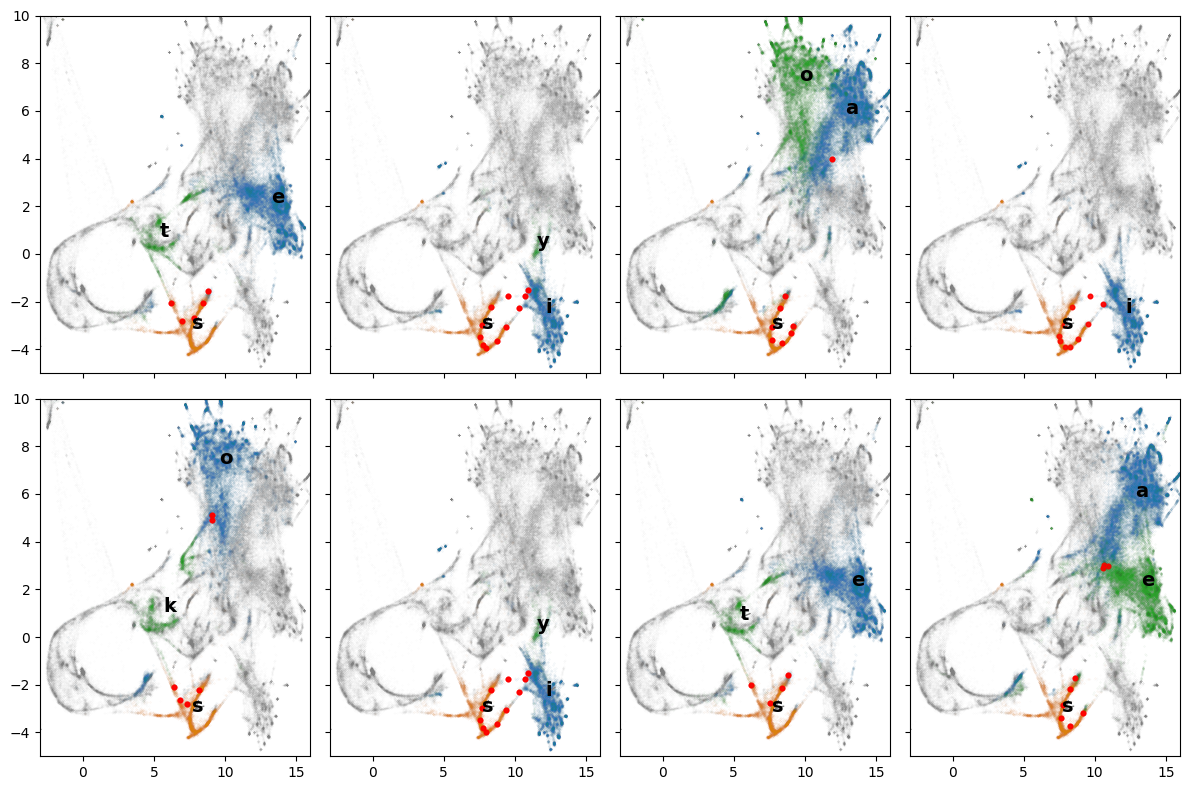

In [80]:
%matplotlib inline
fig, axes = plt.subplots(2, 4, figsize = (12,8), sharex=True, sharey=True)
axes = axes.flatten()

my_articulations = random.choices(articulations, k = 8)

for ax, df_phrase in zip(axes, my_articulations):
    plots.plot_static_trajectory(df_phrase, 
                                 df_anotated, 
                                 ax = ax,
                                 xlim=[-3,16],
                                 ylim=[-5,10])

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib notebook
articulations = u.find_articulations(df_song, 's')
plots.make_phrase_animation(articulations[0], 
                            df_anotated, 
                            fps = 5,
                            figsize = (6, 3))

# Display the saved GIF
from IPython.display import Image
Image(filename="scatter2d.gif")

In [ ]:
%matplotlib notebook
#articulations = u.find_articulations(df_song, 's')
plots.make_phrase_animation(df_song, 
                            df_anotated, 
                            fps = 5,
                            figsize = (6, 3))

# Display the saved GIF
from IPython.display import Image
Image(filename="scatter2d.gif")

In [72]:
not_phones = ['SP']
filter_art = [art for art in u.find_articulations(df_song, 'AP', padding=1)[1:] if ~any(art['phone_base'].isin(not_phones)) ]
df_AP = pd.concat(filter_art, axis = 0)

#df_AP = df_AP[(df_AP['x'] < 4) & (df_AP['y'] < 4)]

Detected 28 articulations


Making a 2d plot


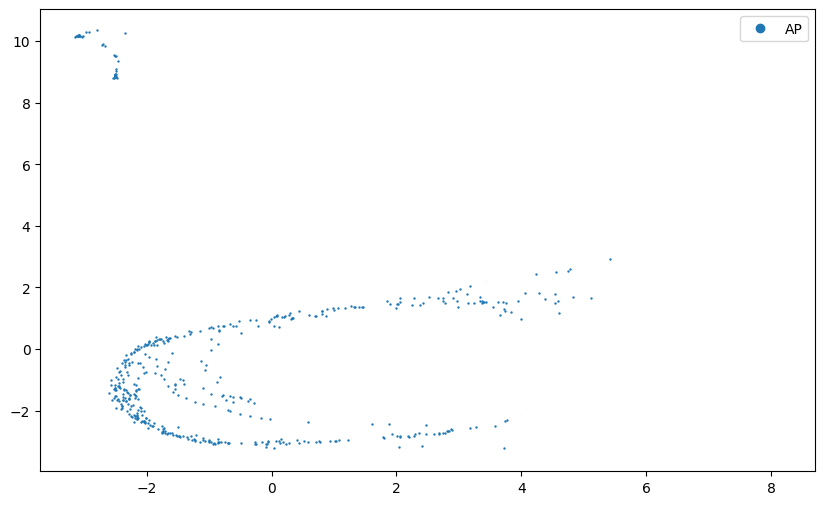

In [73]:
%matplotlib inline
plots.make_tagged_LS_plot(df_AP,
            phones =['AP'],
            alpha = 1, 
            s = 0.5,
            show_global=True,
            add_legend = True)

In [ ]:
%matplotlib notebook
#articulations = u.find_articulations(df_song, 's')
plots.make_phrase_animation(df_AP, 
                            df_anotated, 
                            fps = 5,
                            figsize = (6, 3))

# Display the saved GIF
from IPython.display import Image
Image(filename="scatter2d.gif")

# GT Singer

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/gt_singer_v0/feat_2d'
feat_path = f'{experiment_path}/feat_2d_layer_12.csv'

In [5]:
df_anotated = pd.read_csv(feat_path, index_col=0)

In [6]:
df_anotated['song'].unique()

array(['SOPRANO-i_knew_you_were_trouble-0004', 'SOPRANO-poco-0000',
       'SOPRANO-yellow-0003', 'BASS-quizas_quizas_quizas-0002',
       'BASS-memoria-0001', 'BASS-quizas_quizas_quizas-0004',
       'BASS-quizas_quizas_quizas-0009', 'BASS-cuando_me_enamoro-0001',
       'SOPRANO-wrecking_ball-0001', 'BASS-salvalo-0004',
       'BASS-sabes-0007', 'BASS-amar_y_querer-0001',
       'BASS-la_gata_bajo_la_lluvia-0004',
       'BASS-la_gata_bajo_la_lluvia-0005', 'BASS-tu_sombra_en_mi-0006',
       'BASS-cuando_me_enamoro-0006', 'SOPRANO-situ-0004',
       'BASS-a_gritos_de_esperanza-0005', 'BASS-sabes-0000',
       'BASS-la_gata_bajo_la_lluvia-0000', 'SOPRANO-call_me_maybe-0003',
       'BASS-corre-0001', 'BASS-corre-0003', 'BASS-si_tu_me_amas-0004',
       'BASS-quizas_quizas_quizas-0001', 'BASS-salvalo-0002',
       'BASS-salvalo-0001', 'SOPRANO-poco-0001',
       'BASS-cuando_me_enamoro-0007', 'BASS-memoria-0008',
       'SOPRANO-call_me_maybe-0005', 'BASS-fantasma_de_la_opera-0001',
  

In [7]:
df_anotated['phone_base'].unique()

array(['<SP>', 's', 'j', 'e', 'm', 'p', 'ɾ', 'u', 'd̪', 'ð', 'c', 't̪',
       'k', 'o', 'n', 'θ', 'i', '<AP>', 'β', 'l', 'a', 'ɣ', 'ŋ', 'f', 'w',
       'r', 'b', 'ɟʝ', 'x', 'ʝ', 'tʃ', 'ɡ', 'ç', 'ɲ', 'ʎ'], dtype=object)

In [8]:
df_anotated['singer'] = df_anotated['song'].str.split('-', expand=True)[0]
df_anotated = df_anotated[df_anotated['singer'] == 'BASS'].reset_index()

In [29]:
articulations = u.find_articulations(df_anotated, 'i')

Detected 257 articulations


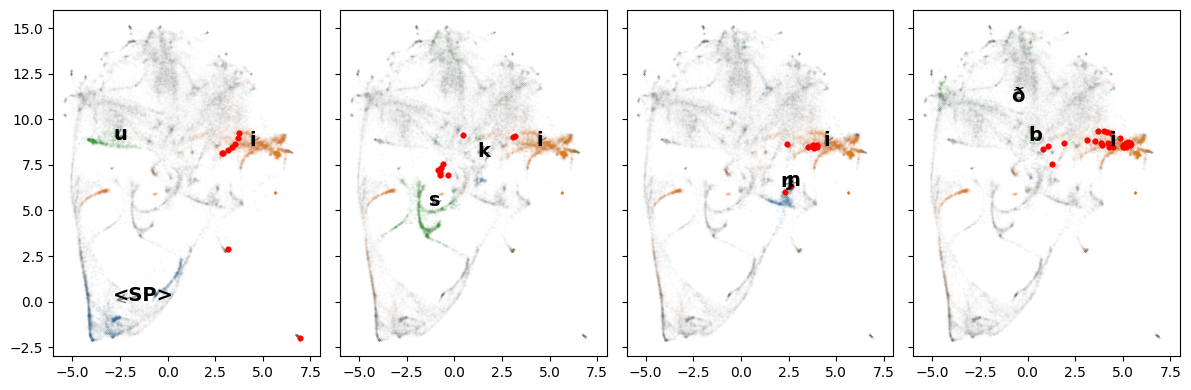

In [30]:
my_choices = random.choices(articulations, k = 4)

fig, axes = plt.subplots(1, 4, figsize = (12,4), sharex=True, sharey=True)
axes = axes.flatten()

for ax, df_phrase in zip(axes, my_choices):
    plots.plot_static_trajectory(df_phrase, 
                                 df_anotated, 
                                 ax = ax,
                                 xlim = [-6,8],
                                 ylim = [-3,16])

plt.tight_layout()
plt.show()

Making a 2d plot


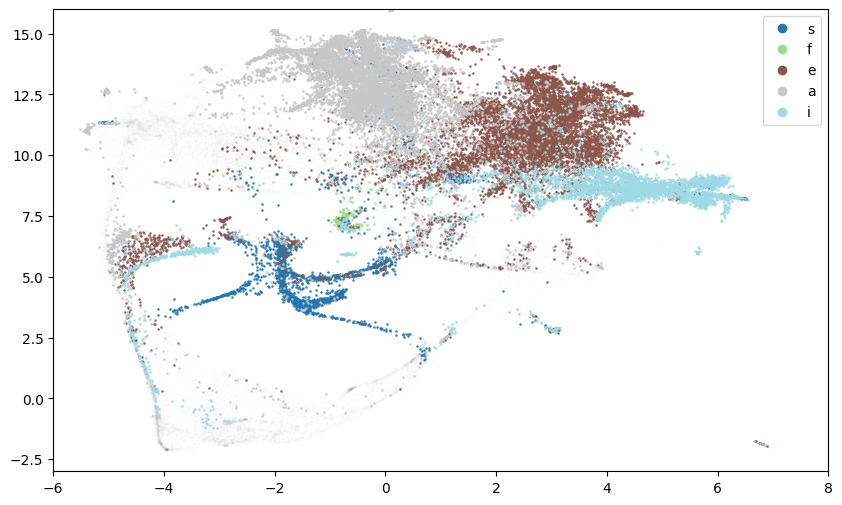

In [31]:
plots.make_tagged_LS_plot(df_anotated,
            phones = ['s', 'f', 'e', 'a', 'i'],
            alpha = 0.8, 
            s = 0.8,
            show_global=True,
            add_legend = True,
            xlim = [-6,8],
            ylim = [-3,16])

Detected 34 articulations


<IPython.core.display.Javascript object>

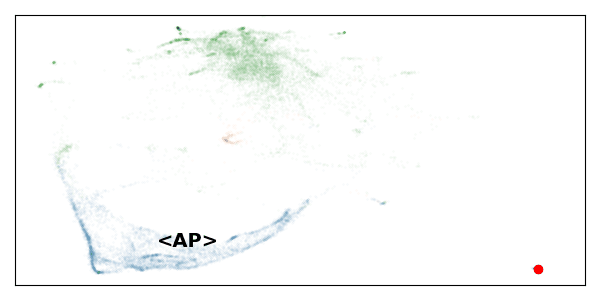

In [45]:
%matplotlib notebook

articulations = u.find_articulations(df_anotated, 'f')

my_articulation = random.choice(articulations)
plots.make_phrase_animation(my_articulation, 
                            df_anotated, 
                            fps = 5,
                            figsize = (6, 3),
                            xlim = [-6,8],
                            ylim = [-3,16])

# Display the saved GIF
from IPython.display import Image
Image(filename="scatter2d.gif")

# GT Singer Bass

In [12]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/gt_singer_bass_v0/feat_2d'
feat_path = f'{experiment_path}/feat_2d_layer_12.csv'

In [13]:
df_anotated = pd.read_csv(feat_path, index_col=0)

In [57]:
articulations = u.find_articulations(df_anotated, 'm')

Detected 182 articulations


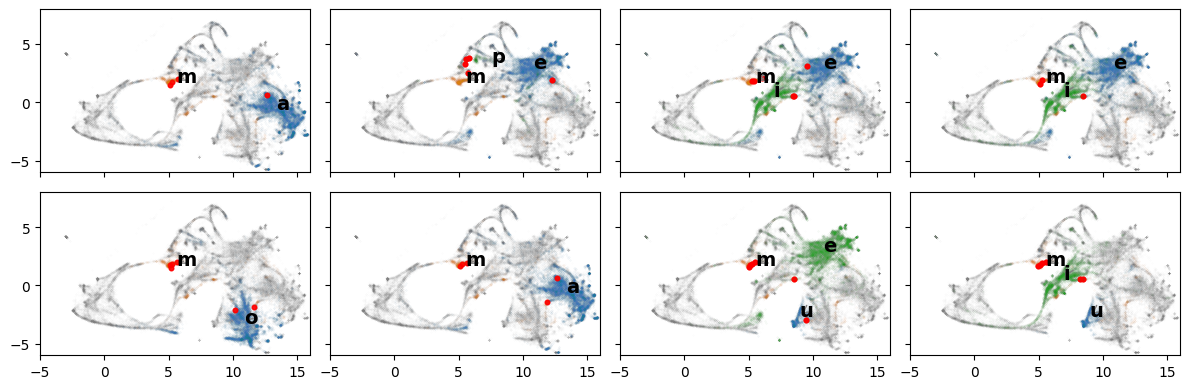

In [58]:
my_choices = random.choices(articulations, k = 8)

fig, axes = plt.subplots(2, 4, figsize = (12,4), sharex=True, sharey=True)
axes = axes.flatten()

for ax, df_phrase in zip(axes, my_choices):
    plots.plot_static_trajectory(df_phrase, 
                                 df_anotated, 
                                 ax = ax,
                                 xlim = [-5,16],
                                 ylim = [-6,8])

plt.tight_layout()
plt.show()

In [34]:
phones = [k for k in df_anotated['phone_base'].value_counts().keys() if k!= '<AP>']

In [38]:
print(phones)

['a', 'e', 'o', 'i', 's', '<SP>', 'n', 'ɾ', 'u', 'm', 't̪', 'ð', 'l', 'k', 'd̪', 'p', 'b', 'j', 'c', 'β', 'w', 'f', 'θ', 'r', 'x', 'ɟʝ', 'ʝ', 'ɣ', 'ŋ', 'tʃ', 'ɲ', 'ɡ', 'ç', 'ʎ']


Making a 2d plot


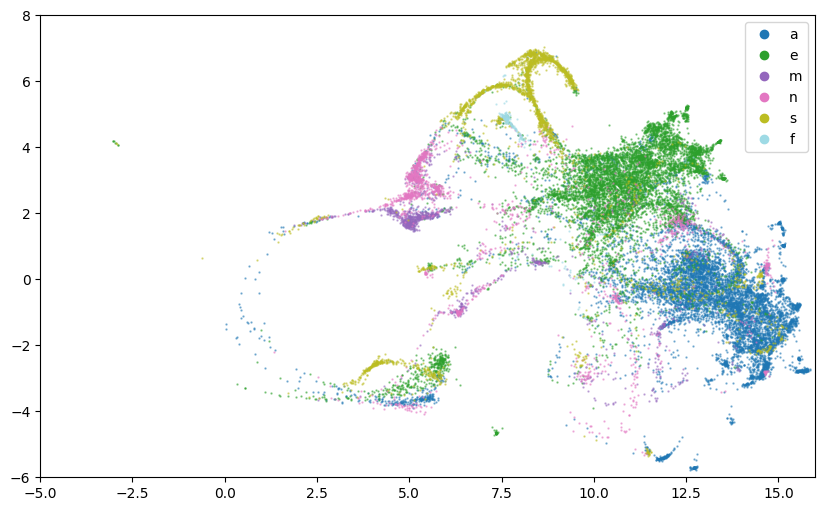

In [56]:
plots.make_tagged_LS_plot(df_anotated,
            phones =['a', 'e', 'm', 'n', 's', 'f'],
            alpha = 0.5, 
            s = 0.5,
            show_global=False,
            add_legend = True,
            xlim = [-5,16],
            ylim = [-6,8])

Detected 226 articulations


<IPython.core.display.Javascript object>

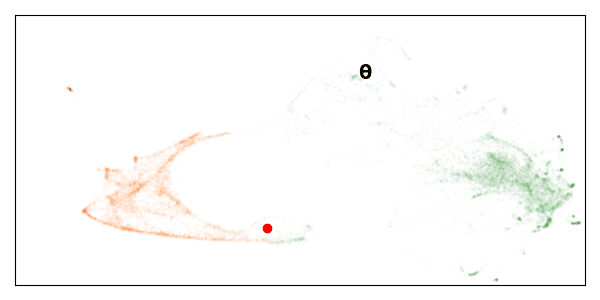

In [64]:
%matplotlib notebook

articulations = u.find_articulations(df_anotated, '<AP>')

my_articulation = random.choice(articulations)
plots.make_phrase_animation(my_articulation, 
                            df_anotated, 
                            fps = 20,
                            figsize = (6, 3),
                            xlim = [-5,16],
                            ylim = [-6,8])

# Display the saved GIF
from IPython.display import Image
Image(filename="scatter2d.gif")